## Gradient Descent Exercise

We model miles per gallon `mpg` based on weight `wt` for the `mtcars` data and use gradient descent to find the slope coefficient.

We are only fitting slope and not intercept, so we will center the data and fit the model

$$
mpg = \beta  \times wt
$$



In [5]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
cars = pd.read_csv('cars.csv')

cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
X = cars[['wt']]
y = cars[['mpg']]

Text(0.5, 1.0, 'Scatterplot of mpg vs wt')

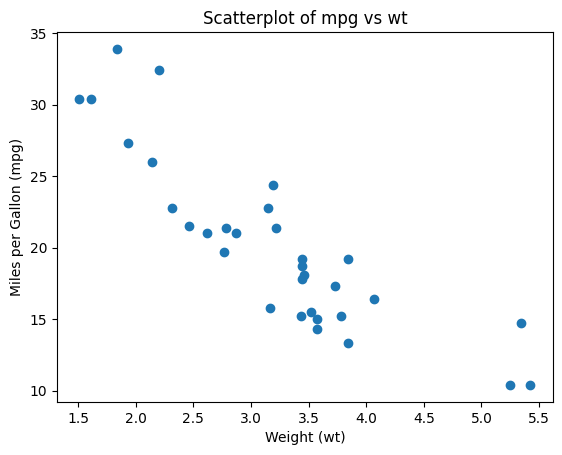

In [9]:
plt.scatter(cars['wt'], cars['mpg'])
plt.xlabel('Weight (wt)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Scatterplot of mpg vs wt')

We are only fitting slope and not intercept, so we will center the data

Text(0, 0.5, 'Centered mpg')

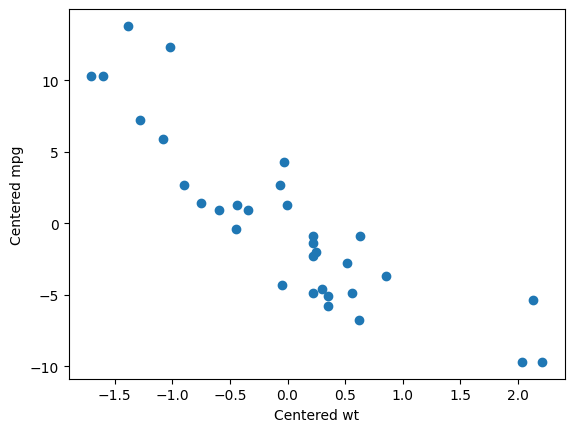

In [10]:
Xcent = X - X.mean()
ycent = y - y.mean()

plt.scatter(Xcent, ycent)
plt.xlabel('Centered wt')
plt.ylabel('Centered mpg')

#### Loss function MSE

The mean square error is simply the SSE/n. We will denote the loss as $J$ as is consistent with machine learning.

$$
J(\beta) = \frac{1}{n}\sum_{i=1} ^n (y^{(i)} - \hat{y}^{(i)})^2
$$

or 

$$
J(\beta) =  \frac{1}{n}
({\bf {Y}} - {\bf X} \beta)^T \  ({\bf {Y}} - {\bf X} \beta)
$$

With derivative 

$$
\frac{\partial J}{\partial \beta} = -\frac{2}{n}  {\bf X}^T  ({\bf {Y}} - {\bf X} \beta) 
$$

(We use partial notation here just because it generalizes. But this is just a single variable derivative)




#### Now define helper functions

We wont define classes here, but we do use matrix notation. Note that `Xcent` and `y` are data frames. In order to do vector and matrix operations, we only want the values. 

In [11]:
Xvals = Xcent.values
yvals = ycent.values

In [12]:
def get_loss(beta, X, y):
    return np.dot((y - X*beta).T, (y - X*beta)) / len(y)

Check this

In [13]:
get_loss(0.5, Xvals, yvals  )

array([[40.37762811]])

In [14]:
def get_gradient(beta, X, y):
    grad = -2 * np.dot((X).T, (y - X*beta)) / len(y)
    return grad

In [15]:
get_gradient(0.5, Xvals, yvals)

array([[10.84103744]])

In [16]:
w = np.random.normal(loc=0.0, scale=0.01, size= 1)

get_loss(w, Xvals, yvals)


array([[35.19549657]])

In [17]:
def perform_gradient_descent(X, y, eta, num_iters):

    #initial value of w. We keep track and append; hence the []
    w_init = np.random.normal(loc=0.0, scale=0.01, size=1)   
    w = np.array([w_init])
    
    loss_init = get_loss(w_init, X, y)
    loss = np.array([loss_init])


    #for a fixed number of iterations
    for i in range(num_iters):
        grad = get_gradient(w[-1], X, y)

        #travel in the direction opposite the gradient
        w_new = w[-1] - eta*grad
        loss_new = get_loss(w_new, X, y)

        w = np.append(w, w_new)
        loss = np.append(loss, loss_new)
        
    return w, loss 

In [18]:
w = [np.random.normal(loc=0.0, scale=0.01, size=1)] 
w.append([1])
w

[array([-0.00863379]), [1]]

In [19]:
beta_vals, loss = perform_gradient_descent(Xvals, yvals, 0.01, 200)

Text(0.5, 1.0, 'Final beta: -5.22')

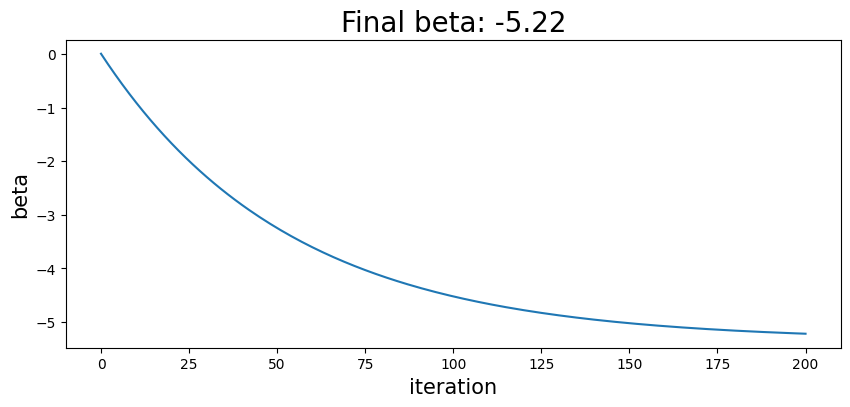

In [20]:
plt.figure(figsize=(10,4))
plt.plot(beta_vals)
plt.xlabel('iteration', fontsize=15)
plt.ylabel('beta', fontsize=15)
plt.title('Final beta: %s'%np.round(beta_vals[-1].item(),2), fontsize=20)

Text(0.5, 1.0, 'Final loss: 8.71')

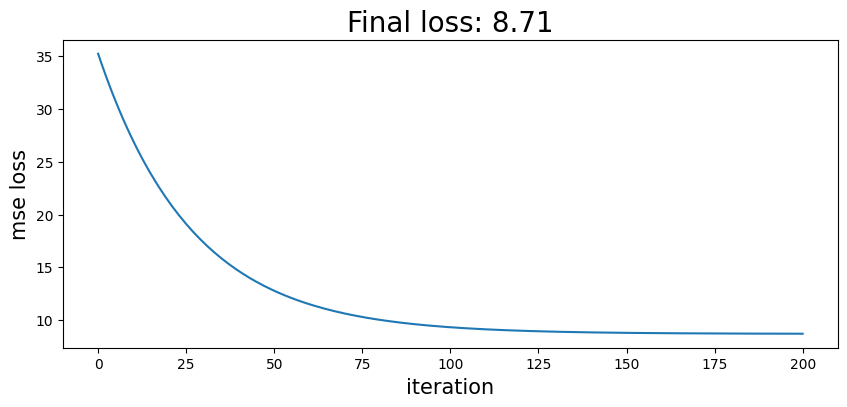

In [21]:
plt.figure(figsize=(10,4))
plt.plot(loss)
plt.xlabel('iteration', fontsize=15)
plt.ylabel('mse loss', fontsize=15)
plt.title('Final loss: %s'%round(loss[-1],2), fontsize=20)

### Check the fit visually

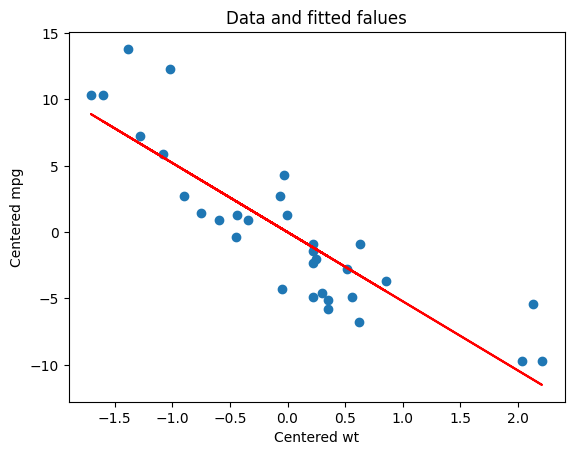

In [22]:
beta = beta_vals[-1]
preds = beta * Xvals

plt.scatter(Xvals[:, 0], yvals[:, 0])
plt.plot(Xvals[:, 0], preds[:, 0], color='red')
plt.xlabel('Centered wt')
plt.ylabel('Centered mpg')
plt.title('Data and fitted falues')
plt.show()

## Now try scaling

In [23]:
from sklearn.preprocessing import StandardScaler

Xvals = StandardScaler().fit_transform(cars[['wt']])
yvals = StandardScaler().fit_transform(cars[['mpg']])

Text(0.5, 1.0, 'Scaled final beta: -0.85')

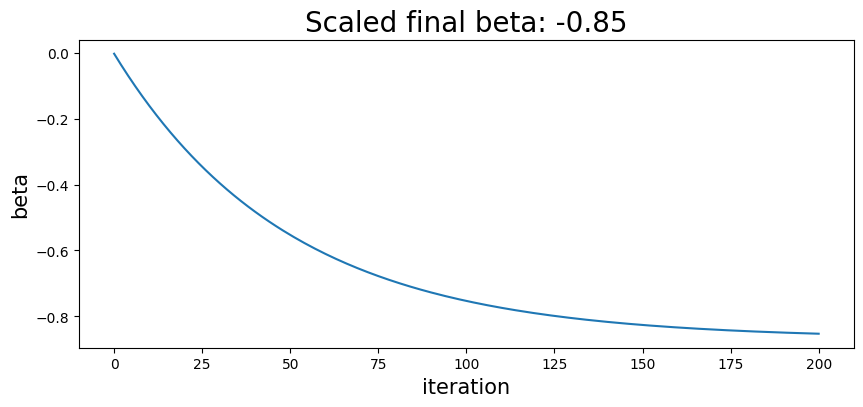

In [24]:
beta_vals, loss = perform_gradient_descent(Xvals, yvals, 0.01, 200)

plt.figure(figsize=(10,4))
plt.plot(beta_vals)
plt.xlabel('iteration', fontsize=15)
plt.ylabel('beta', fontsize=15)
plt.title('Scaled final beta: %s'%np.round(beta_vals[-1].item(),2), fontsize=20)

Text(0.5, 1.0, 'Scaled final loss: 0.25')

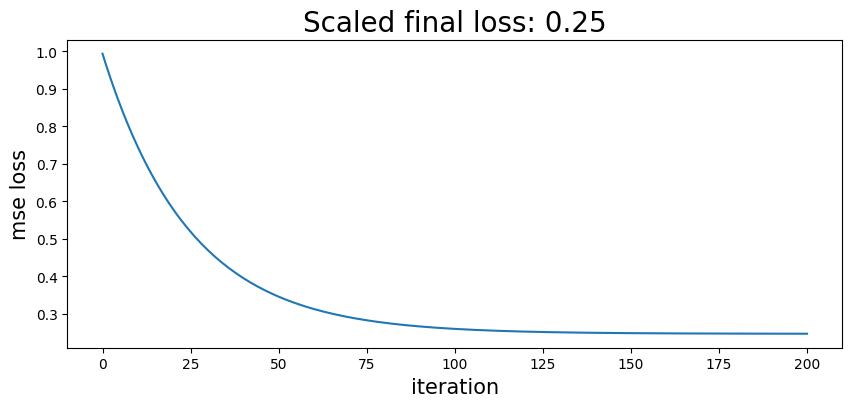

In [25]:
plt.figure(figsize=(10,4))
plt.plot(loss)
plt.xlabel('iteration', fontsize=15)
plt.ylabel('mse loss', fontsize=15)
plt.title('Scaled final loss: %s'%round(loss[-1],2), fontsize=20)

### Check the fit visually

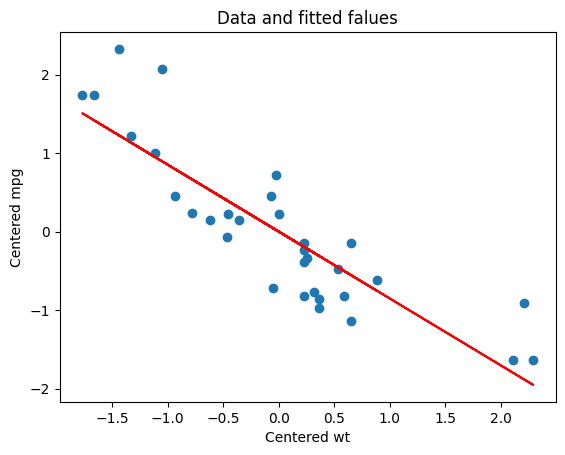

In [26]:
beta = beta_vals[-1]
preds = beta * Xvals

plt.scatter(Xvals[:, 0], yvals[:, 0])
plt.plot(Xvals[:, 0], preds[:, 0], color='red')
plt.xlabel('Centered wt')
plt.ylabel('Centered mpg')
plt.title('Data and fitted falues')
plt.show()